# Partitional Clustering of Countries Economic Development without Zero-Mean Scaling

In [1]:
import numpy as np

from tslearn.clustering import silhouette_score

from Clustering import TimeSeriesPartitions

from Utils import DataUtils, PreProcessing, VisualUtils, TimeSeriesUtils

In [2]:
n = 113
T_gdp = 118
T_pop = 118
T = 58
start_year = 1960

names_path = "Data/names.txt"
gdp_path = "Data/yp_raw.csv"
population_path = "Data/pop_raw.csv"
currency_path = "Data/currency.csv"
map_path = "Data/Map/ne_110m_admin_0_countries.shp"
labels_path = "Results/clustering_labels.csv"

In [3]:
names, gdp, pop, currency, map = DataUtils.load_clustering_data(
    names_path, gdp_path, population_path, currency_path, map_path, n, T_gdp, T_pop, T
)
gdp_data = np.log(gdp[:, -T:])
pop_data = pop[:, -T:]

In [4]:
df, scaled_df, scaled_data = PreProcessing.preprocess_onlyGDP(names, gdp_data, start_year, T, zero_mean=False)

Silhouette Score: 0.19193976143343894
Cluster #1 size: 15
Cluster #1 members: COG, DOM, EGY, GTM, HND, IDN, LKA, MAR, MNG, PER, PHL, PRY, SLV, THA, TUN
Cluster #2 size: 8
Cluster #2 members: CAF, COD, HTI, LBR, MDG, NER, SLE, TGO
Cluster #3 size: 3
Cluster #3 members: CIV, NIC, ZMB
Cluster #4 size: 5
Cluster #4 members: BOL, GHA, NGA, SDN, SEN
Cluster #5 size: 4
Cluster #5 members: IRQ, RUS, SRB, VEN
Cluster #6 size: 1
Cluster #6 members: SAU
Cluster #7 size: 6
Cluster #7 members: CMR, MRT, PAK, PSE, SYR, YEM
Cluster #8 size: 25
Cluster #8 members: AUS, AUT, BEL, CAN, CHE, DEU, DNK, ESP, FIN, FRA, GBR, GRC, HKG, IRL, ISR, ITA, JPN, NLD, NOR, NZL, OMN, PRT, SGP, SWE, USA
Cluster #9 size: 12
Cluster #9 members: BEN, BGD, BIH, CHN, GIN, IND, KEN, LAO, MMR, NPL, TZA, VNM
Cluster #10 size: 3
Cluster #10 members: BDI, MWI, ZWE
Cluster #11 size: 2
Cluster #11 members: IRN, LBN
Cluster #12 size: 21
Cluster #12 members: ARG, BGR, BRA, CHL, COL, CRI, DZA, ECU, HRV, HUN, JOR, KOR, MEX, MYS, PAN, 

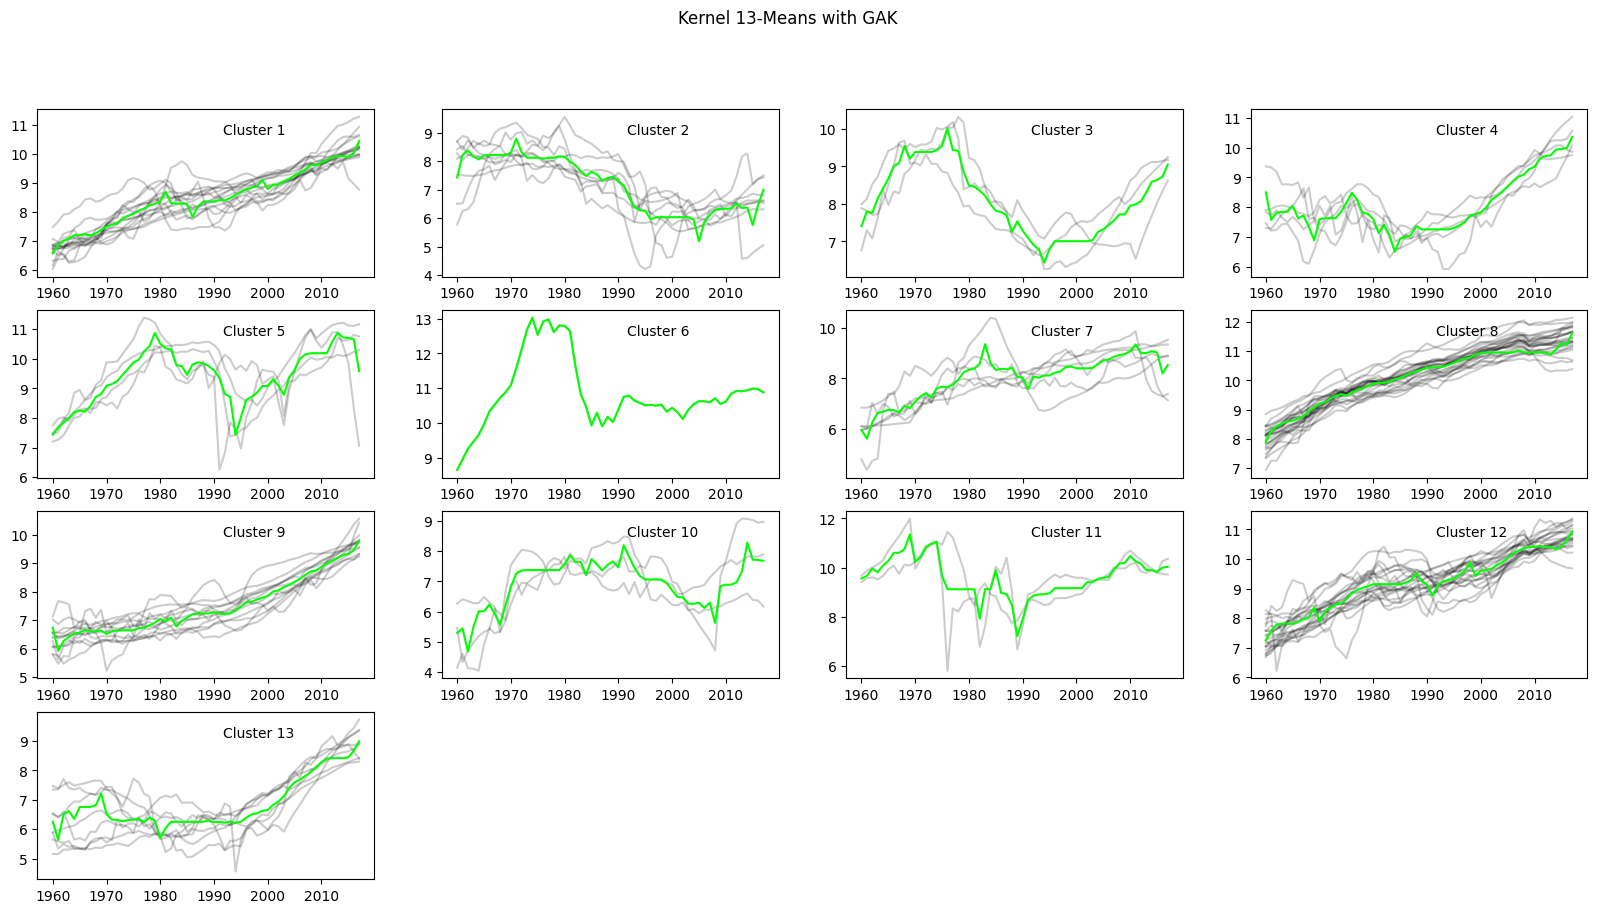

In [5]:
y_k = TimeSeriesPartitions.kernel_k_means(scaled_df, 13, 10000)
cluster_centers_k = TimeSeriesUtils.cluster_centroids(scaled_data, 13, y_k, T)
score_k = silhouette_score(scaled_df, y_k)
clusters_kmed = VisualUtils.show_clustering(
    names, 
    13, 
    scaled_data, 
    cluster_centers_k, 
    y_k, 
    score_k, 
    4, 
    4, 
    start_year, 
    T, 
    "Kernel 13-Means with GAK"
)

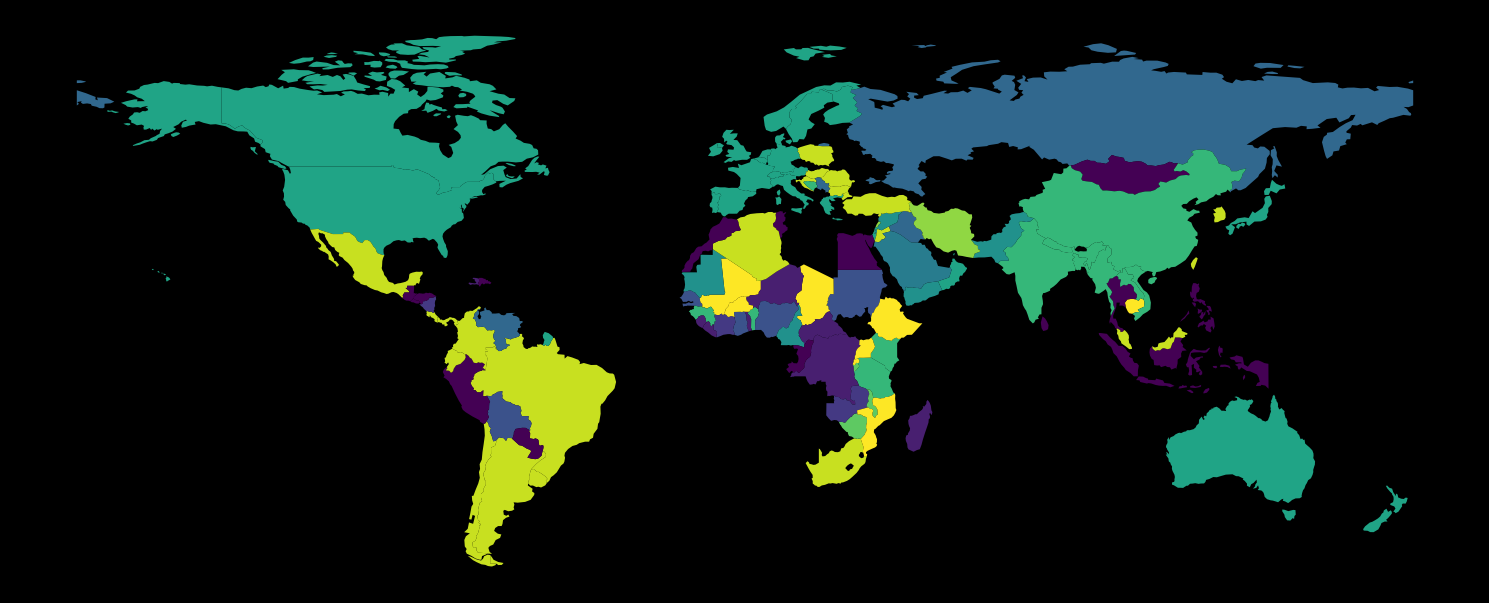

In [6]:
VisualUtils.show_clusters_on_map(names, y_k, map)

In [7]:
DataUtils.write_labels(names, y_k, labels_path)